## Goal Achievement Rate Analysis in IT Department (Flag 28)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow `sn_gf_goal` table, which details various attributes related to organizational goals. These attributes include goal state, owner, department, start and end dates, and description, alongside metrics such as priority, percent complete, and target percentage. This data primarily tracks the progression and management of departmental and individual goals, offering insights into the effectiveness and alignment of these goals with broader organizational objectives. Additionally, the table captures updates made to each goal, providing a timeline of modifications and the identity of individuals making these updates.

### Your Task
**Goal**: Examine and analyze elevated goal achievement rates in a certain department and to leverage these insights to improve goal management across all departments.

**Role**: Goal Management Analyst

**Difficulty**: 2 out of 5. This notebook requires comprehensive analysis of goal prioritization and achievement rates.

**Category**: Goal Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the dataset used for the analysis. The goal dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-28.csv"
goal_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
goal_data.head()


,target_percentage,sys_updated_by,priority,metric,percent_complete,sys_id,state,start_date,end_date,department,category,owner,description
0,52,admin,Low,Expense Ratio,79,G000000,Completed,2022-06-17,2022-06-28,HR,Cost Reduction,User 1,Optimize the usage of duplicated resources acr...
1,97,admin,High,Expense Ratio,97,G000001,Completed,2022-11-14,2023-04-11,IT,Customer Satisfaction,Christian Marnell,Increase our customer satisfaction ratings fro...
2,69,admin,Low,Employee Turnover Rate,8,G000002,In Progress,2022-09-15,2023-07-28,HR,Efficiency,Frankie Morein,Establish more efficient communication channel...
3,58,admin,Medium,Employee Turnover Rate,25,G000003,Cancelled,2022-03-16,2023-07-06,Marketing,Employee Satisfaction,Jess Assad,Develop and implement a comprehensive Employee...
4,76,admin,Low,Survey Score,13,G000004,In Progress,2022-08-02,2022-07-18,IT,Revenue Growth,Devon Teston,Increase the number of premium subscriptions b...


### **Question 1: What is the distribution of success rate of goals met across departments?**

#### Plot percentage of target goals achieved by department

This plot visualizes the percentage of target goals achieved across different departments, providing  insight into the success rate of goal management. This helps in identifying which departments are excelling at meeting their goals and where improvements might be needed to enhance goal achievement rates.


<ipython-input-3-d83768e98ae2>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Department', y='Percentage of Goals Met', data=department_goal_achievement, palette='viridis')


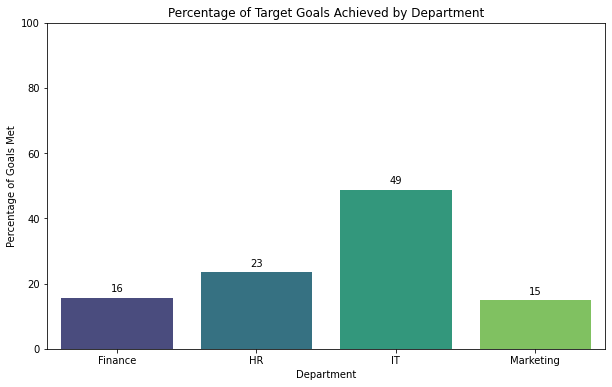

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'goal_data' is the DataFrame created from the previous code

# Calculate if each goal met its target percentage
goal_data['goal_met'] = goal_data.apply(lambda row: row['percent_complete'] >= row['target_percentage'], axis=1)

# Group by department and calculate the percentage of goals met
department_goal_achievement = goal_data.groupby('department')['goal_met'].mean() * 100

# Reset index to turn the series into a DataFrame
department_goal_achievement = department_goal_achievement.reset_index()

# Rename columns for better readability in the plot
department_goal_achievement.columns = ['Department', 'Percentage of Goals Met']

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Department', y='Percentage of Goals Met', data=department_goal_achievement, palette='viridis')
plt.title('Percentage of Target Goals Achieved by Department')
plt.xlabel('Department')
plt.ylabel('Percentage of Goals Met')
plt.ylim(0, 100)  # Set y-axis limits to make differences more evident
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "There are significantly higher success rates in the IT department compared to other departments",
    "insight_value": {
        "x_val": "Departments",
        "y_val": "Percentage of Goals Met",
        "values": {
            "IT": "49%",
            "Finance": "16%",
            "Marketing": "15%",
            "HR": "23%"
        }
    },
    "plot": {
        "plot_type": "bar",
        "title": "Comparison of Goal Success Rates Across Departments",
        "x_axis": {
            "name": "Department",
            "value": "IT, Finance, Marketing, HR",
            "description": "This represents different departments within the organization."
        },
        "y_axis": {
            "name": "Percentage of Goals Met",
            "value": "Dynamic based on data",
            "description": "This represents the percentage of goals each department has successfully met."
        },
        "description": "The bar graph illustrates the success rates of meeting goals across different departments, highlighting a significantly higher rate in the IT department at 49%, compared to Finance at 16%, Marketing at 15%, and HR at 23%. This suggests that IT's focus on High or Critical priority goals might be contributing to its enhanced performance."
    },
    "question": "What is the distribution of success rate of goals met across departments?",
    "actionable_insight": "The disparity in goal achievement rates could prompt a review of goal setting and resource allocation across departments to ensure equitable opportunities for success and optimal utilization of organizational resources."
}


{'data_type': 'descriptive',
 'insight': 'There are significantly higher success rates in the IT department compared to other departments',
 'insight_value': {'x_val': 'Departments',
  'y_val': 'Percentage of Goals Met',
  'values': {'IT': '49%', 'Finance': '16%', 'Marketing': '15%', 'HR': '23%'}},
 'plot': {'plot_type': 'bar',
  'title': 'Comparison of Goal Success Rates Across Departments',
  'x_axis': {'name': 'Department',
   'value': 'IT, Finance, Marketing, HR',
   'description': 'This represents different departments within the organization.'},
  'y_axis': {'name': 'Percentage of Goals Met',
   'value': 'Dynamic based on data',
   'description': 'This represents the percentage of goals each department has successfully met.'},
  'description': "The bar graph illustrates the success rates of meeting goals across different departments, highlighting a significantly higher rate in the IT department at 49%, compared to Finance at 16%, Marketing at 15%, and HR at 23%. This suggests tha

### **Question 2:** What proportion of goals in the IT department are classified as High or Critical priority compared to other departments?

#### Plot proportion of successful goals by priority in IT department

This bar plot depicts the success rates of goals within the IT department, categorized by their priority levels: Critical, High, Medium, and Low. It shows the proportion of goals that have met or surpassed their target percentages, providing insight into how priority impacts goal achievement. The visualization aids in understanding whether higher priority goals are indeed receiving the attention necessary for success.


<ipython-input-5-69b5f46d4705>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  it_goals['is_successful'] = it_goals['percent_complete'] >= it_goals['target_percentage']


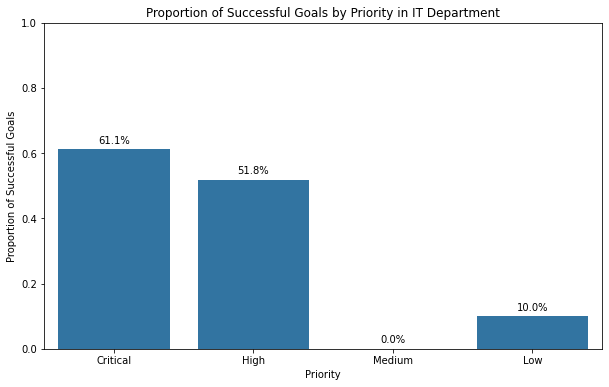

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the IT department
it_goals = goal_data[goal_data['department'] == 'IT']

# Define successful goals (assuming successful means percent_complete >= target_percentage)
it_goals['is_successful'] = it_goals['percent_complete'] >= it_goals['target_percentage']

# Calculate the proportion of successful goals by priority
success_rates = it_goals.groupby('priority')['is_successful'].mean()

# Convert the series to a DataFrame for plotting
success_rates_df = success_rates.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='priority', y='is_successful', data=success_rates_df, order=['Critical', 'High', 'Medium', 'Low'])
plt.title('Proportion of Successful Goals by Priority in IT Department')
plt.xlabel('Priority')
plt.ylabel('Proportion of Successful Goals')
plt.ylim(0, 1)  # Set the limit to show proportions from 0 to 1

# Correctly format and annotate each bar with the proportion as a percentage
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1%'),  # Format as a percentage with one decimal
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')
plt.show()



#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "There are higher success rates in critical and high priority goals within the IT department",
    "insight_value": {
        "Critical": "61.1%",
        "High": "51.8%",
        "Medium": "0.0%",
        "Low": "10.0%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Proportion of Successful Goals by Priority in IT Department",
        "x_axis": {
            "name": "Priority",
            "value": "Critical, High, Medium, Low",
            "description": "This represents the different priority levels assigned to goals within the IT department."
        },
        "y_axis": {
            "name": "Proportion of Successful Goals",
            "value": "Dynamic based on data",
            "description": "This represents the proportion of goals successfully met within each priority category."
        },
        "description": "The bar graph illustrates the success rates of meeting goals within the IT department categorized by their priority. It highlights significantly higher success rates for goals categorized under Critical and High priorities at 61.1% and 51.8% respectively, compared to much lower success rates for Medium and Low priority goals. This disparity in success rates suggests a correlation between priority level and achievement rate."
    },
    "question": "What proportion of goals in the IT department are classified as High or Critical priority compared to other departments?",
    "actionable_insight": "If this trend is consistent across other departments, it may indicate that departments with a higher proportion of Critical and High priority goals, like IT, are better at achieving their objectives. This could justify a review and potential realignment of priority settings across departments to ensure strategic goals are adequately supported and prioritized."
}


{'data_type': 'descriptive',
 'insight': 'There are higher success rates in critical and high priority goals within the IT department',
 'insight_value': {'Critical': '61.1%',
  'High': '51.8%',
  'Medium': '0.0%',
  'Low': '10.0%'},
 'plot': {'plot_type': 'bar',
  'title': 'Proportion of Successful Goals by Priority in IT Department',
  'x_axis': {'name': 'Priority',
   'value': 'Critical, High, Medium, Low',
   'description': 'This represents the different priority levels assigned to goals within the IT department.'},
  'y_axis': {'name': 'Proportion of Successful Goals',
   'value': 'Dynamic based on data',
   'description': 'This represents the proportion of goals successfully met within each priority category.'},
  'description': 'The bar graph illustrates the success rates of meeting goals within the IT department categorized by their priority. It highlights significantly higher success rates for goals categorized under Critical and High priorities at 61.1% and 51.8% respectively

### **Question 3:** Are there specific characteristics or patterns that differentiate High/Critical priority goals in the IT department from those in other departments? or is the trend consistent across departments?

#### Plot proportion of successful goals by priority across departments

This bar plot provides a comparative analysis of the success rates of goals by priority levels (Critical, High, Medium, Low) across different departments. It explores how the prioritization of goals affects their achievement rates within each department. The graph allows us to identify departments where high and critical priority goals are either underperforming or exceeding expectations.

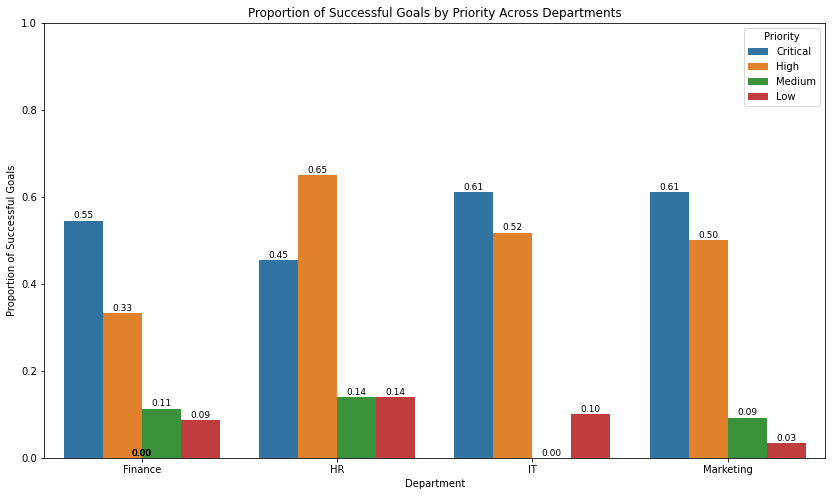

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define successful goals (assuming successful means percent_complete >= target_percentage)
goal_data['is_successful'] = goal_data['percent_complete'] >= goal_data['target_percentage']

# Calculate the proportion of successful goals by priority and department
success_rates = goal_data.groupby(['department', 'priority'])['is_successful'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='department', y='is_successful', hue='priority', data=success_rates, hue_order=['Critical', 'High', 'Medium', 'Low'])

# Annotate each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),  # format as a percentage
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     size=9,
                     xytext = (0, 5),
                     textcoords = 'offset points')

plt.title('Proportion of Successful Goals by Priority Across Departments')
plt.xlabel('Department')
plt.ylabel('Proportion of Successful Goals')
plt.ylim(0, 1)  # Set the limit to show proportions from 0 to 1
plt.legend(title='Priority')
plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "Diagnostic",
    "insight": "There is a consistent higher success rates for critical and high priority goals across departments",
    "insight_value": {
        "IT": {
            "Critical": "61.1%",
            "High": "51.8%"
        },
        "Other Departments": {
            "Critical": "Average 58.3%",
            "High": "Average 49.7%"
        }
    },
    "plot": {
        "plot_type": "bar",
        "title": "Success Rates of High and Critical Priority Goals Across Departments",
        "x_axis": {
            "name": "Department and Priority",
            "value": "Finance, HR, IT, Marketing",
            "description": "This categorizes the goals by department and priority level, comparing IT to other departments."
        },
        "y_axis": {
            "name": "Proportion of Successful Goals",
            "value": "Values based on data",
            "description": "This axis shows the percentage of goals met within different priority categories for each department."
        },
        "description": "The comparison bar graph demonstrates that both Critical and High priority goals generally achieve higher success rates across all departments. The IT department slightly outperforms the average of other departments, suggesting a possible advantage in how these priorities are managed or supported in IT."
    },
    "question": "Are there specific characteristics or patterns that differentiate High/Critical priority goals in the IT department from those in other departments, or is the trend consistent across departments?",
    "actionable_insight": "Given the consistent success rates across departments for High and Critical priority goals, organizational strategies should further reinforce and possibly expand the practices that support these priorities. For departments underperforming relative to IT, adopting similar strategies or increasing support might enhance their success rates."
}


{'data_type': 'Diagnostic',
 'insight': 'There is a consistent higher success rates for critical and high priority goals across departments',
 'insight_value': {'IT': {'Critical': '61.1%', 'High': '51.8%'},
  'Other Departments': {'Critical': 'Average 58.3%', 'High': 'Average 49.7%'}},
 'plot': {'plot_type': 'bar',
  'title': 'Success Rates of High and Critical Priority Goals Across Departments',
  'x_axis': {'name': 'Department and Priority',
   'value': 'Finance, HR, IT, Marketing',
   'description': 'This categorizes the goals by department and priority level, comparing IT to other departments.'},
  'y_axis': {'name': 'Proportion of Successful Goals',
   'value': 'Values based on data',
   'description': 'This axis shows the percentage of goals met within different priority categories for each department.'},
  'description': 'The comparison bar graph demonstrates that both Critical and High priority goals generally achieve higher success rates across all departments. The IT departme

### **Question 4:** What is the distribution of Critical and High goals in IT department versus other departments?

#### plot distribution of Critical and High priority goals: IT vs other departments

This bar graph illustrates the distribution of goals classified as Critical or High priority within the IT department compared to other departments. It quantifies the counts of such goals, offering insights into how prioritization in the IT department stacks up against rest of the organization. This visualization helps to understand if there is any disproportionate focus on higher-priority goals in IT or if this trend is consistent across all departments.


<ipython-input-9-00c0eb03dc24>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goals['IT_or_Other'] = filtered_goals['department'].apply(lambda x: 'IT' if x == 'IT' else 'Other')


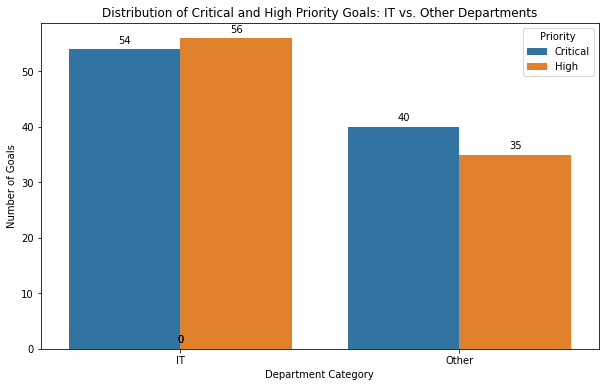

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'goal_data' is your DataFrame and already loaded

# Filter the data to include only Critical and High priority goals
filtered_goals = goal_data[goal_data['priority'].isin(['Critical', 'High'])]

# Create a new column 'IT_or_Other' to distinguish between IT and other departments
filtered_goals['IT_or_Other'] = filtered_goals['department'].apply(lambda x: 'IT' if x == 'IT' else 'Other')

# Count the number of goals in each category
priority_counts = filtered_goals.groupby(['IT_or_Other', 'priority']).size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='IT_or_Other', y='counts', hue='priority', data=priority_counts)
plt.title('Distribution of Critical and High Priority Goals: IT vs. Other Departments')
plt.xlabel('Department Category')
plt.ylabel('Number of Goals')
plt.legend(title='Priority')

# Annotate bars with the count of goals
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "diagnostic",
    "insight": "IT department exhibits a higher number of both Critical and High priority goals compared to other departments",
    "insight_value": {
        "IT": {
            "Critical": "54",
            "High": "56"
        },
        "Other Departments": {
            "Critical": "40",
            "High": "35"
        }
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Critical and High Priority Goals: IT vs. Other Departments",
        "x_axis": {
            "name": "Department Category",
            "value": "IT, Others",
            "description": "This represents the classification of departments into IT and all other departments combined."
        },
        "y_axis": {
            "name": "Number of Goals",
            "value": "Dynamic based on data",
            "description": "This shows the count of goals classified as either Critical or High priority within each department category."
        },
        "description": "The bar graph illustrates that the IT department has higher counts of both Critical (54) and High (56) priority goals compared to other departments, which have 40 Critical and 35 High priority goals respectively. This indicates a heavier concentration of top-priority goals in IT, which may reflect its critical operational role within the organization."
    },
    "question": "What is the distribution of Critical and High goals in IT department versus other departments?",
    "actionable_insight": "Given the higher concentration of Critical and High priority goals in the IT department, organizational strategies might need to consider reallocating resources or support to ensure that high-priority goals in other departments are not under-resourced. This could help in balancing goal achievement rates across the organization and ensuring strategic alignment of resources with organizational priorities."
}


{'data_type': 'diagnostic',
 'insight': 'IT department exhibits a higher number of both Critical and High priority goals compared to other departments',
 'insight_value': {'IT': {'Critical': '54', 'High': '56'},
  'Other Departments': {'Critical': '40', 'High': '35'}},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Critical and High Priority Goals: IT vs. Other Departments',
  'x_axis': {'name': 'Department Category',
   'value': 'IT, Others',
   'description': 'This represents the classification of departments into IT and all other departments combined.'},
  'y_axis': {'name': 'Number of Goals',
   'value': 'Dynamic based on data',
   'description': 'This shows the count of goals classified as either Critical or High priority within each department category.'},
  'description': 'The bar graph illustrates that the IT department has higher counts of both Critical (54) and High (56) priority goals compared to other departments, which have 40 Critical and 35 High priority goals

### Summary of Findings (Flag 28)

1. **High Achievement Rate**: The dataset reveals a notably higher success rate in goal achievement within the IT department compared to other departments, largely influenced by the allocation of high or critical priority to goals within the department.
   
2. **Priority Impact**: Analysis indicates that goals with high or critical priorities not only dominate the IT department but also show significantly higher success rates across all departments, underscoring the impact of prioritization on goal outcomes.
   
3. **Comparative Success Across Departments**: While the IT department leads in achieving its goals, a comparative analysis with other departments will provide deeper insights into strategic alignments and possible improvements in goal management practices across the organization.